In [1]:
import torch #is torch my Neural Network package I am using? 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# This function helps us visualize the learning process
def plot_fit(x_data, y_data, model_prediction, title="Model Fit"):
    plt.figure(figsize=(8, 5))
    plt.scatter(x_data, y_data, color='blue', label='Real Data (Ice Flow)')
    plt.scatter(x_data, model_prediction, color='red', label='Model Guess')
    plt.title(title)
    plt.legend()
    plt.show()

print("Gym is open! Ready to train.")

Gym is open! Ready to train.


Current Loss (Error): 0.0000


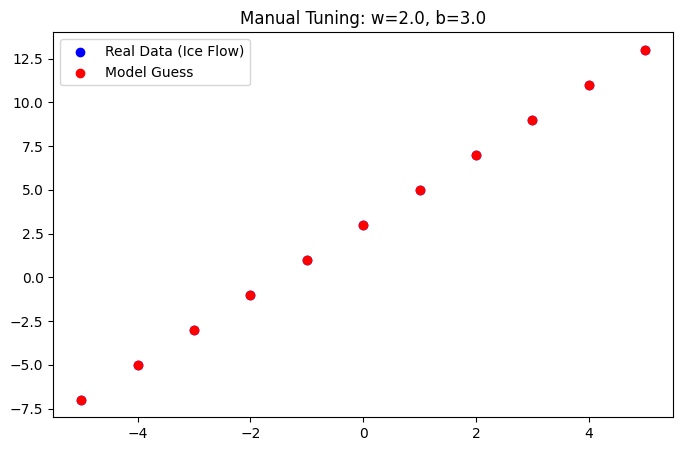

In [5]:
# --- 1. Create Dummy Data (A straight line) ---
# Imagine this is a simple glacier: Slope (x) vs Velocity (y)
X = torch.tensor([-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
Y_real = 2.0 * X + 3.0  # The secret formula is y = 2x + 3

# --- 2. Initialize Parameters (Your hand on the knobs) ---
# TRY THIS: Change these numbers to try and match the blue dots!
w = torch.tensor(2.0)  # Guessing the slope is 1
b = torch.tensor(3.0)  # Guessing the intercept is 0

# --- 3. Forward Pass (The Prediction) ---
def forward_pass(x, w, b):
    return w * x + b

Y_pred = forward_pass(X, w, b)

# --- 4. Calculate Loss (How bad is the guess?) ---
loss = torch.mean((Y_pred - Y_real)**2)

print(f"Current Loss (Error): {loss.item():.4f}")
plot_fit(X, Y_real, Y_pred, title=f"Manual Tuning: w={w}, b={b}")

# === EXERCISE ===
# 1. Run this cell. Look at the red dots vs blue dots.
# 2. Change 'w' to 2.0. Run it again. What happens to the red line?
# 3. Change 'b' to 3.0. Run it again. Does the Loss go to 0?

Epoch 0 | Loss: 90.5565


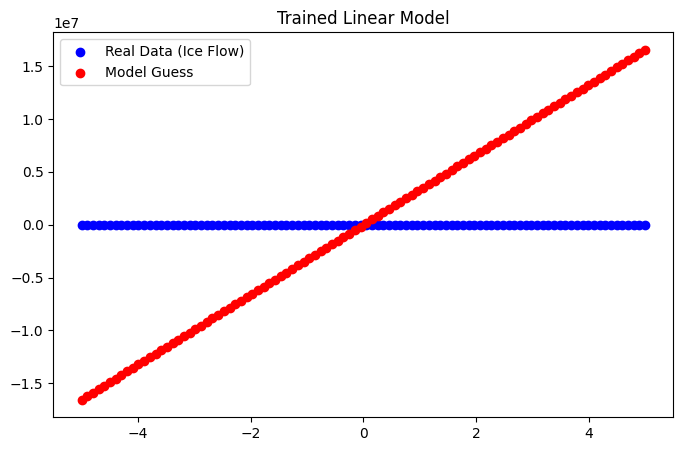

In [8]:
# --- 1. Data ---
X = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1) # 100 points
Y_real = 3.0 * X + 2.0 + (torch.randn(X.size()) * 0.5) # y = 3x + 2 + noise

# --- 2. The Model (Linear Layer) ---
# nn.Linear(1, 1) means: 1 Input (x) -> 1 Output (y)
# It automatically creates 'w' and 'b' for us.
model = nn.Linear(in_features=1, out_features=1)

# --- 3. The Setup ---
loss_fn = nn.MSELoss()                  # Mean Squared Error
optimizer = torch.optim.SGD(model.parameters(), lr=1.0) # Stochastic Gradient Descent

# --- 4. The Training Loop ---
epochs = 5 # How many times to see the data

for epoch in range(epochs):
    # Step 1: Forward Pass
    y_pred = model(X)
    
    # Step 2: Loss
    loss = loss_fn(y_pred, Y_real)
    
    # Step 3: Zero Gradients (Clean up previous step) & Backward (Calculate new grads)
    optimizer.zero_grad()
    loss.backward()
    
    # Step 4: Step (Update weights)
    optimizer.step()
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

# Visualize the final result
plot_fit(X, Y_real, model(X).detach(), title="Trained Linear Model")

# === EXERCISE ===
# 1. Change 'lr=0.01' to 'lr=1.0' (Too high). Run it. Does it work?
# 2. Change 'epochs' to 5 (Too short). Run it. Does it fit?